In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 1 Die Implementierung eines Kalman Filters

Dieses Dokument basiert auf:
### Kalman and Bayesian Filters in Python
#### Roger R Labbe Jr
#### February 18, 2016

Wir haben verrauschte Messungen in der Zeit vorliegen und wenden einen g-h Filter an, um die unverrauschten Werte zu schätzen. 

## 1.1 Darlegung des Problems
Daten liegen in 2D vor. Messfehler (Rauschen) haben wir nur in der y-Dimension. Das Rauschen ist nicht explizit getrennt vorhanden. Wir wenden einen Filter an, um die unverrauschten Werte zu extrahieren.

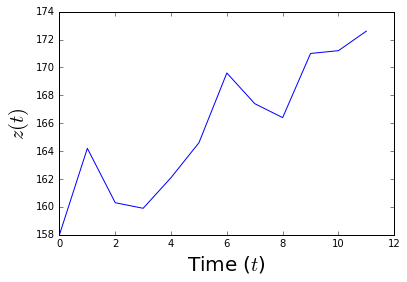

In [3]:
#
# Beispieldaten 
#
z = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

plt.plot(z)
plt.xlabel('Time ($t$)', size=20)
plt.ylabel('$z(t)$', size = 20)

Wir formulieren die Hypothesen 
1. Ho: die Werte $z(t)$ sind unabhängig von der Zeit $t$,
2. H1: die Werte $z(t)$ verändern sich mit der Zeit $t$.

Ist Ho wahr, dann können wir weiter annehmen, dass die Werte $z(t)$ eigentlich konstant $\bar{z}$ betragen. Der beobachtete Trend wäre dann rein zufällig entstanden.

Wir verwenden den Mittelwert, da bei Vorliegen von mehr als einem Wert der Mittelwert eine bessere Schätzung für den wahren Wert darstellt.

In [4]:
#
# der Mittelwert ist:
print np.mean(z)

165.608333333


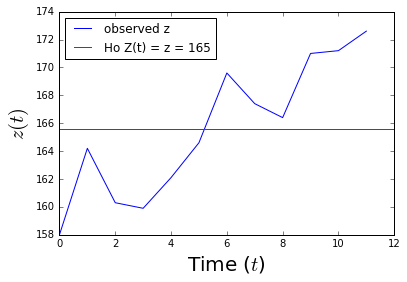

In [5]:
plt.plot(z, label='observed z')
plt.plot([0,12], [np.mean(z), np.mean(z)], c='r', label = 'Ho Z(t) = z = 165')
plt.xlabel('Time ($t$)', size=20)
plt.ylabel('$z(t)$', size = 20)
plt.legend(loc='best')

In [6]:
x = range(len(z))
slope, intercept = np.polyfit(x, z, 1)
print "est Slope: ", slope
print "intercept: ", intercept

est Slope:  1.23041958042
intercept:  158.841025641


In [7]:
print np.polyfit(x,z,1)

[   1.23041958  158.84102564]


Wir lassen uns $N$ *len(z)* **int** Zufallswerte aus dem Intervall [158, 172] generieren und bestimmen den Anteil $p$ bei dem *est. Slope* $\geq 1$ ist. 

In [8]:
r = np.random.uniform(np.min(z), np.max(z), len(z))
print r

[ 167.23385869  160.71910122  172.34651268  169.15173419  162.17382047
  161.58963065  159.63550255  170.90619614  165.08597468  166.50258218
  163.12215723  160.34837926]


In [9]:
s, ic = np.polyfit(x, r, 1)
print s

-0.318552733581


In [10]:
count = 0
s = 0
while s < 1.0 and count < 25000:
    r = np.random.uniform(np.min(z), np.max(z), len(z))
    s, ic = np.polyfit(x,r,1)
    count = count + 1
    

print s, count, 1.0/count

1.08665204267 298 0.00335570469799


In [11]:
def rgt1s():
    count = 0
    s = 0
    while s < 1.0 and count < 50000:
        r = np.random.randint(np.min(z), np.max(z), len(z))
        s, ic = np.polyfit(x,r,1)
        count = count + 1
            
    return count

In [12]:
cs = np.asarray(rgt1s())
print cs

53


In [13]:
for N in np.arange(1000):
    cs = np.append(cs, rgt1s())
    
print cs
print np.mean(cs)

[  53  411 5178 ..., 1140  251  421]
1117.81418581


In [14]:
print np.median(cs)

777.0


In [15]:
import timeit

In [16]:
%timeit for N in range(10): rgt1s()

1 loops, best of 3: 890 ms per loop


(array([ 509.,  250.,  123.,   62.,   28.,   16.,    7.,    3.,    2.,    1.]),
 array([  1.00000000e+00,   7.98200000e+02,   1.59540000e+03,
          2.39260000e+03,   3.18980000e+03,   3.98700000e+03,
          4.78420000e+03,   5.58140000e+03,   6.37860000e+03,
          7.17580000e+03,   7.97300000e+03]),
 <a list of 10 Patch objects>)

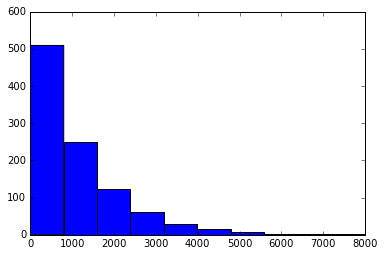

In [18]:
plt.hist(cs)

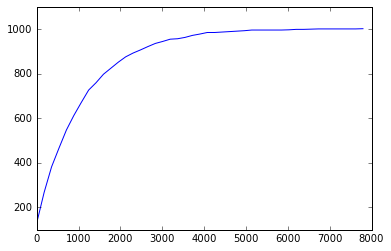

In [19]:
#
# cumulative distribution plot
# some fake data
# evaluate the histogram
values, base = np.histogram(cs, bins=45)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')

(array([ 0.13086913,  0.26773227,  0.38161838,  0.46553447,  0.54645355,
         0.61138861,  0.66933067,  0.72527473,  0.75824176,  0.7962038 ,
         0.82317682,  0.85014985,  0.87412587,  0.89110889,  0.90509491,
         0.92007992,  0.93406593,  0.94305694,  0.95304695,  0.95504496,
         0.96103896,  0.97002997,  0.97602398,  0.98301698,  0.98301698,
         0.98501499,  0.98701299,  0.98901099,  0.99100899,  0.99400599,
         0.99400599,  0.99400599,  0.99400599,  0.99400599,  0.995005  ,
         0.997003  ,  0.997003  ,  0.998002  ,  0.999001  ,  0.999001  ,
         0.999001  ,  0.999001  ,  0.999001  ,  0.999001  ,  1.        ]),
 array([  1.00000000e+00,   1.78155556e+02,   3.55311111e+02,
          5.32466667e+02,   7.09622222e+02,   8.86777778e+02,
          1.06393333e+03,   1.24108889e+03,   1.41824444e+03,
          1.59540000e+03,   1.77255556e+03,   1.94971111e+03,
          2.12686667e+03,   2.30402222e+03,   2.48117778e+03,
          2.65833333e+03,   2.8

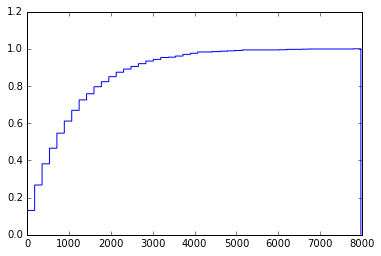

In [20]:
plt.hist(cs, 45, normed=1, histtype='step', cumulative=True)